## Import libraries

In [23]:
import json
import requests
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  # matplotlib is not installed automatically
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")

## Load target station info 

In [121]:
os.chdir(r'G:\Shared drives\Ryoko and Hilary\SMSigxSMAP')
network_name = 'Kenya' #{'Oznet', 'Kenya'}
station_name = 'Kaplelach' # {'Alabama', 'Athwana', 'Kaplelach', 'Shidley', 'Tendwet'}

input_path = r"G:\Shared drives\Ryoko and Hilary\SMSigxSMAP\analysis\1_data"
output_path = r"G:\Shared drives\Ryoko and Hilary\SMSigxSMAP\analysis\3_data_out"
appeears_path = r"APPEEARS_subsetting"
SMAPL3_path = r"SPL3SMP_E"
SMAPL4_path = r"SPL4SMGP"
SMAPL4_grid_path = r"SMAPL4SMGP_EASEreference"
MODIS_path = r"MOD15A2H"
PET_path = r"dPET_data_4RA"


In [131]:
file_path = os.path.join(input_path, appeears_path, network_name, f'{network_name}-request.json')
with open(file_path, 'r') as infile:
    request_content = json.load(infile)
request_content

coordinates = request_content['params']['coordinates']
dates = request_content['params']['dates']
coordinates

[{'id': '0',
  'category': 'Tendwet (Forest)',
  'latitude': -0.7096,
  'longitude': 35.472189},
 {'id': '1',
  'category': 'Kaplelach (Shrub and Agri)',
  'latitude': -0.210981,
  'longitude': 35.080503},
 {'id': '2',
  'category': 'Shidley (Savannah)',
  'latitude': 0.096639,
  'longitude': 39.337963},
 {'id': '3',
  'category': 'Athwana (Residential and Agri)',
  'latitude': 0.125549,
  'longitude': 37.843426}]

In [122]:
# dates
i=0
target_lat = coordinates[i]['latitude']
target_lon = coordinates[i]['longitude']
target_station = coordinates[i]['category']

## Read synched data

In [123]:
file_path = os.path.join(input_path, appeears_path, network_name.upper(), f'timeseries_synced_{station_name}.csv')
ds_synced = pd.read_csv(file_path)
ds_synced['Date'] = pd.to_datetime(ds_synced['Date'])
ds_synced.set_index('Date', inplace=True)
ds_synced

,SPL3SMP_E_005_Soil_Moisture_Retrieval_Data_AM_soil_moisture,SPL3SMP_E_005_Soil_Moisture_Retrieval_Data_PM_soil_moisture_pm,soil_moisture_smapL3,precip,noprecip,MODISmeanLAI_SMAPgrid,skippable
Date,,,,,,,
2015-04-01,0.437355,0.354840,0.396097,0.000055,False,0.757636,False
2015-04-02,NaN,NaN,NaN,0.000074,False,0.755973,False
2015-04-03,NaN,0.412284,0.412284,0.000323,False,0.754309,False
2015-04-04,0.452008,NaN,0.452008,0.000689,False,0.840071,False
2015-04-06,0.464213,NaN,0.464213,0.000294,False,1.011595,False
...,...,...,...,...,...,...,...
2022-03-25,0.319838,NaN,0.319838,0.000112,False,1.116688,False
2022-03-26,NaN,NaN,NaN,0.000127,False,1.126849,False
2022-03-27,0.440498,0.417834,0.429166,0.000032,False,1.155323,False


## Read PET data

In [124]:
file_path = os.path.join(input_path, PET_path, station_name)
file_list = os.listdir(file_path)
print(file_list)
PET = pd.read_csv(os.path.join(file_path, file_list[0]), header=None)
day_num = PET.index.to_numpy()
year = file_list[0][-8:-4]
PET['Date'] = pd.to_datetime(PET.index, unit='D', origin=pd.Timestamp(year))
PET.set_index('Date', inplace=True)


['dPET_-0.21_35.01_2016.txt', 'dPET_-0.21_35.01_2019.txt', 'dPET_-0.21_35.01_2021.txt', 'dPET_-0.21_35.01_2022.txt', 'dPET_-0.21_35.01_2017.txt', 'dPET_-0.21_35.01_2020.txt', 'dPET_-0.21_35.01_2015.txt', 'dPET_-0.21_35.01_2018.txt']


In [125]:
for i, file in enumerate(file_list):
    PET = pd.read_csv(os.path.join(file_path, file), header=None)
    year = file[-8:-4]
    PET['Date'] = pd.to_datetime(PET.index, unit='D', origin=pd.Timestamp(year))
    PET.set_index('Date', inplace=True)
    if i==0:
        ds_PET = PET
    else:
        ds_PET = pd.concat([ds_PET, PET])
ds_PET = ds_PET.sort_index()
ds_PET = ds_PET.rename(columns = {0:'PET'})
ds_PET

,PET
Date,
2015-01-01,4.76142
2015-01-02,5.25641
2015-01-03,5.39234
2015-01-04,5.07467
2015-01-05,4.65211
...,...
2022-12-27,0.00000
2022-12-28,0.00000
2022-12-29,0.00000


In [126]:
ds_synced2 = pd.merge(ds_synced, ds_PET, how='inner', left_index=True, right_index=True)
ds_synced2


,SPL3SMP_E_005_Soil_Moisture_Retrieval_Data_AM_soil_moisture,SPL3SMP_E_005_Soil_Moisture_Retrieval_Data_PM_soil_moisture_pm,soil_moisture_smapL3,precip,noprecip,MODISmeanLAI_SMAPgrid,skippable,PET
Date,,,,,,,,
2015-04-01,0.437355,0.354840,0.396097,0.000055,False,0.757636,False,2.89486
2015-04-02,NaN,NaN,NaN,0.000074,False,0.755973,False,4.39374
2015-04-03,NaN,0.412284,0.412284,0.000323,False,0.754309,False,3.12236
2015-04-04,0.452008,NaN,0.452008,0.000689,False,0.840071,False,1.41809
2015-04-06,0.464213,NaN,0.464213,0.000294,False,1.011595,False,3.31473
...,...,...,...,...,...,...,...,...
2022-03-25,0.319838,NaN,0.319838,0.000112,False,1.116688,False,4.68181
2022-03-26,NaN,NaN,NaN,0.000127,False,1.126849,False,4.13583
2022-03-27,0.440498,0.417834,0.429166,0.000032,False,1.155323,False,3.99243


## Plot

### Timeseries

In [127]:
# prep
lat = target_lat
lon = target_lon

smap_color = '#ff7f0e'
precip_color = '#779eb2'

title = f"{network_name}: {target_station}\n({lat:.2f}, {lon:.2f})"
save_title = f"{network_name}_{target_station}"
plt.rcParams['font.size'] = 12

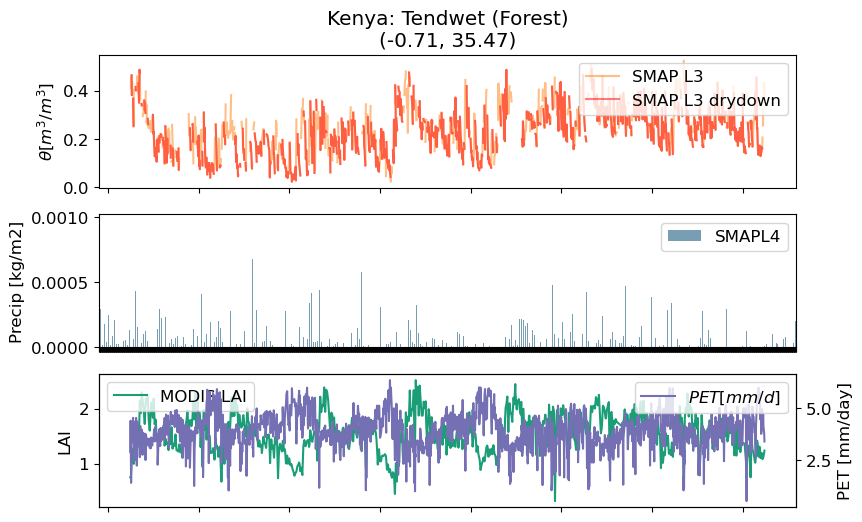

In [128]:
# Get drydown timeseries for plotting
ds_synced2['dSdt'] = ds_synced2['soil_moisture_smapL3'].diff()
ds_synced2['dSdt'][ds_synced2['dSdt']>0] = np.nan
ds_synced2['dSdt(t+1)'] = ds_synced2['dSdt'].shift(periods=-1).copy()
ds_synced2[['soil_moisture_smapL3','dSdt(t+1)', 'noprecip', 'MODISmeanLAI_SMAPgrid']].head(30)

ds_synced2['values_while_drydown'] = ds_synced2['soil_moisture_smapL3']
drydown_period = ds_synced2['dSdt(t+1)'].notna()
drydown_period = drydown_period.shift(periods=+1) | drydown_period
ds_synced2['values_while_drydown'][drydown_period==False] = np.nan
noprecip_with_buffer = (ds_synced2['noprecip']==True) | (ds_synced2['noprecip'].shift(periods=-1)==True)
ds_synced2['values_while_drydown'][noprecip_with_buffer==False] = np.nan

# SMAP timeseries 
fig = plt.figure(figsize=(9, 9))

# fig.subplots(1, 2, sharey=True, sharex=True,  figsize=(10, 5))
ax1 = fig.add_subplot(4,1,1)
line1, = ax1.plot(ds_synced2.index, ds_synced2['soil_moisture_smapL3'].values, '-', alpha=0.5, label='SMAP L3', color=smap_color)
line2, = ax1.plot(ds_synced2['values_while_drydown'], '-', alpha=0.5, label='SMAP L3 drydown', color='red')
xax = ax1.xaxis
ax1.set_title(title)
ax1.set_xlabel("Time")
ax1.set_ylabel(r"$\theta [m^3/m^3]$")
# ax1.set_ylabel("Surface soil moisture [mm/max25mm]")
ax1.legend(loc='upper right')

# Precipitation
ax2 =  fig.add_subplot(4,1,2) #, sharex = ax1)
ds_synced2['precip'].plot.bar(y='first', ax=ax2, label='SMAPL4', color=precip_color)
ax2.set_xlabel("Time")
ax2.set_ylabel("Precip [kg/m2]")
ax2.legend(loc='upper right')

# Precipitation
ax3 =  fig.add_subplot(4,1,3) #, sharex = ax1)
ax4 = ax3.twinx()

line3, = ax3.plot(ds_synced2['MODISmeanLAI_SMAPgrid'], '-', label='MODIS LAI', color='#1b9e77')
line4, = ax4.plot(ds_synced2['PET'], '-', label=label_PET, color='#7570b3')
ax3.set_xlabel("Time")
ax3.set_ylabel("LAI")
ax4.set_ylabel("PET [mm/day]")
ax3.legend(loc='upper left')
ax4.legend(loc='upper right')

for ind, label in enumerate(ax2.get_xticklabels()):
    if ind % 365 == 0:
        label.set_visible(True)
    else:
        label.set_visible(False)

for ind, label in enumerate(ax4.get_xticklabels()):
    if ind % 365 == 0:
        label.set_visible(True)
    else:
        label.set_visible(False)
        
fig.autofmt_xdate()
fig.savefig(os.path.join(output_path, f'{save_title}_ts.png'))


In [129]:
os.path.join(output_path, f'{save_title}_ts.png')

'G:\\Shared drives\\Ryoko and Hilary\\SMSigxSMAP\\analysis\\3_data_out\\Kenya_Tendwet (Forest)_ts.png'

### 2D plot  (LAI as Z-axis, PET as color bar)

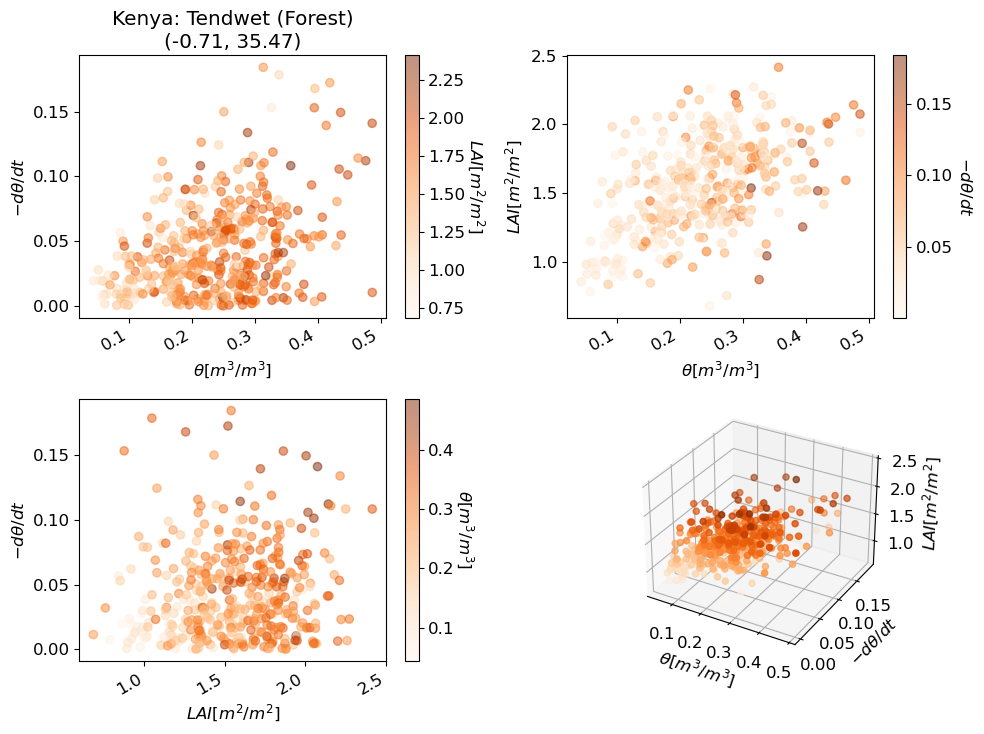

In [116]:
label_SM = r"$\theta [m^3/m^3]$"
label_dSdt = r"$-d\theta/dt$"
label_lai = r"$LAI [m^2/m^2]$"
label_PET = r"$PET [mm/d]$"

fig = plt.figure(figsize=(10, 7.5), tight_layout=True)
# fig.tight_layout(pad=5)
sm = ds_synced2['soil_moisture_smapL3'][ds_synced2['noprecip']].values
neg_dSdt = ds_synced2['dSdt(t+1)'][ds_synced2['noprecip']].values*-1
lai = ds_synced2['MODISmeanLAI_SMAPgrid'][ds_synced2['noprecip']].values

ax1 =  fig.add_subplot(2,2,1)
scatter = ax1.scatter(x=sm, y=neg_dSdt, c=lai, cmap= 'Oranges', marker='o', alpha=0.5, label='SMAP L4')
xax = ax1.xaxis
ax1.set_title(title)
ax1.set_xlabel(label_SM)
ax1.set_ylabel(label_dSdt)
cbar = plt.colorbar(scatter, ax=ax1)
cbar.ax.get_yaxis().labelpad = 15
cbar.ax.set_ylabel(label_lai, rotation=270)
fig.autofmt_xdate()

ax2 =  fig.add_subplot(2,2,2)
scatter = ax2.scatter(x=sm, y=lai, c=neg_dSdt, cmap= 'Oranges', marker='o', alpha=0.5, label='SMAP L4')
xax = ax2.xaxis
# ax2.set_title(title)
ax2.set_xlabel(label_SM)
ax2.set_ylabel(label_lai)
cbar = plt.colorbar(scatter, ax=ax2)
cbar.ax.get_yaxis().labelpad = 15
cbar.ax.set_ylabel(label_dSdt, rotation=270)
fig.autofmt_xdate()

ax3 =  fig.add_subplot(2,2,3)
scatter = ax3.scatter(x=lai, y=neg_dSdt, c=sm, cmap= 'Oranges', marker='o', alpha=0.5, label='SMAP L4')
xax = ax3.xaxis
# ax3.set_title(title)
ax3.set_xlabel(label_lai)
ax3.set_ylabel(label_dSdt)
cbar = plt.colorbar(scatter, ax=ax3)
cbar.ax.get_yaxis().labelpad = 15
cbar.ax.set_ylabel(label_SM, rotation=270)
fig.autofmt_xdate()

from mpl_toolkits import mplot3d

ax4 =  fig.add_subplot(2,2,4, projection='3d')

# Data for a three-dimensional line
ax4.scatter3D(sm, neg_dSdt, lai, c=lai, cmap='Oranges');
ax4.set_xlabel(label_SM)
ax4.set_ylabel(label_dSdt)
ax4.set_zlabel(label_lai)

fig.savefig(os.path.join(output_path, f'{save_title}_Ltheta.png'))



### 2D plot  (PET as Z-axis, LAI as color bar)

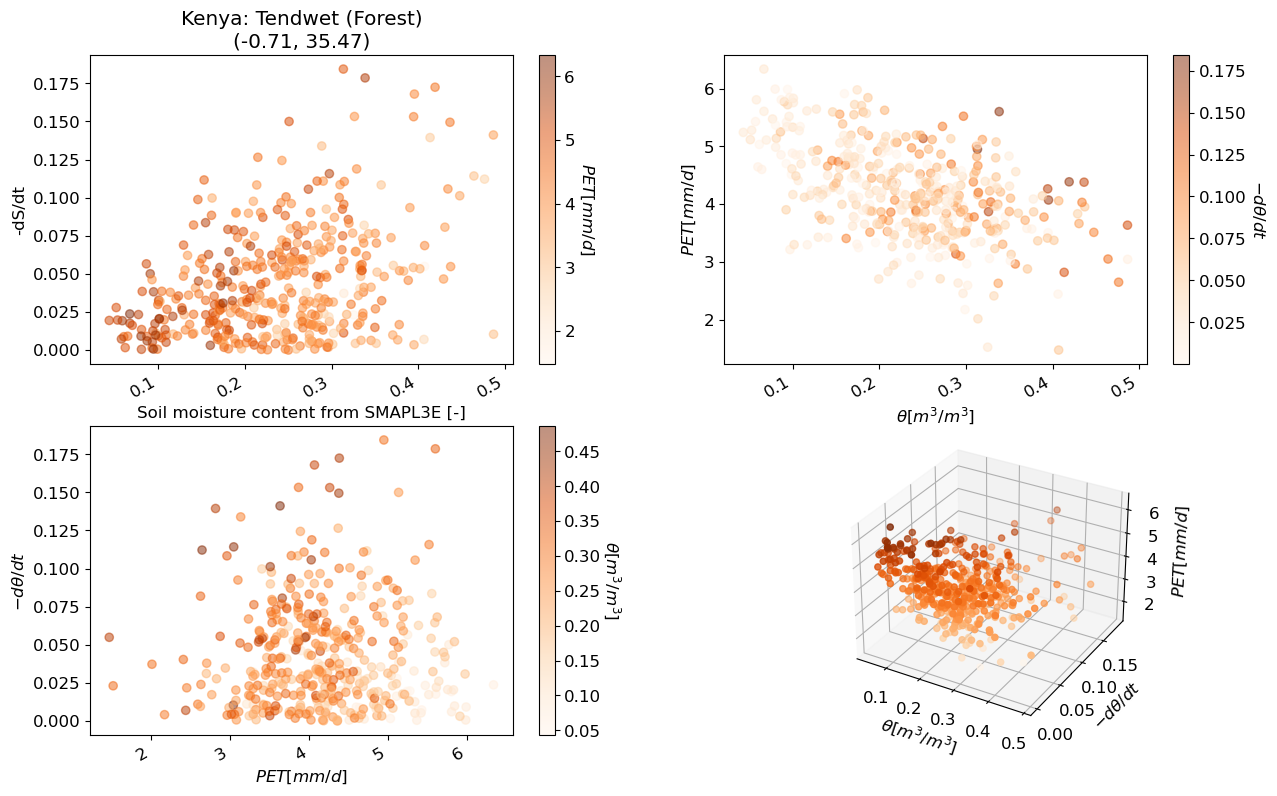

In [117]:
fig = plt.figure(figsize=(15, 10))
fig.tight_layout(pad=5)
sm = ds_synced2['soil_moisture_smapL3'][ds_synced2['noprecip']].values
neg_dSdt = ds_synced2['dSdt(t+1)'][ds_synced2['noprecip']].values*-1
pet = ds_synced2['PET'][ds_synced2['noprecip']].values

ax1 =  fig.add_subplot(2,2,1)
scatter = ax1.scatter(x=sm, y=neg_dSdt, c=pet, cmap= 'Oranges', marker='o', alpha=0.5, label='SMAP L4')
xax = ax1.xaxis
ax1.set_title(title)
ax1.set_xlabel("Soil moisture content from SMAPL3E [-]")
ax1.set_ylabel("-dS/dt")
cbar = plt.colorbar(scatter, ax=ax1)
cbar.ax.get_yaxis().labelpad = 15
cbar.ax.set_ylabel(label_PET, rotation=270)
fig.autofmt_xdate()

ax2 =  fig.add_subplot(2,2,2)
scatter = ax2.scatter(x=sm, y=pet, c=neg_dSdt, cmap= 'Oranges', marker='o', alpha=0.5, label='SMAP L4')
xax = ax2.xaxis
# ax2.set_title(title)
ax2.set_xlabel(label_SM)
ax2.set_ylabel(label_PET)
cbar = plt.colorbar(scatter, ax=ax2)
cbar.ax.get_yaxis().labelpad = 15
cbar.ax.set_ylabel(label_dSdt, rotation=270)
fig.autofmt_xdate()

ax3 =  fig.add_subplot(2,2,3)
scatter = ax3.scatter(x=pet, y=neg_dSdt, c=sm, cmap= 'Oranges', marker='o', alpha=0.5, label='SMAP L4')
xax = ax3.xaxis
# ax3.set_title(title)
ax3.set_xlabel(label_PET)
ax3.set_ylabel(label_dSdt)
cbar = plt.colorbar(scatter, ax=ax3)
cbar.ax.get_yaxis().labelpad = 15
cbar.ax.set_ylabel(label_SM, rotation=270)
fig.autofmt_xdate()

from mpl_toolkits import mplot3d

ax4 =  fig.add_subplot(2,2,4, projection='3d')

# Data for a three-dimensional line
ax4.scatter3D(sm, neg_dSdt, pet, c=pet, cmap='Oranges');
ax4.set_xlabel(label_SM)
ax4.set_ylabel(label_dSdt)
ax4.set_zlabel(label_PET)

fig.savefig(os.path.join(output_path, f'{save_title}_Ltheta_PET.png'))



### 3D plot (LAI as Z-axis, PET as color bar)

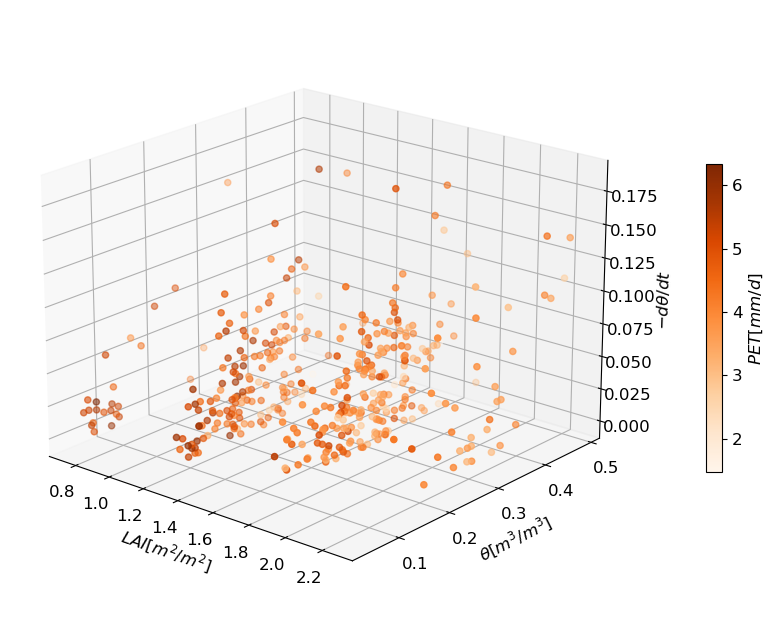

In [118]:
bins = [0, 0.5, 1, 1.5, 2, 2.5]
labels = [0.25, 0.75, 1.25, 1.75, 2.25]
# bins = [0, 0.1, 0.2, 0.3, 0.4, 0.5]
# labels = [0.05, 0.15, 0.25, 0.35, 0.45]
lai_binned = pd.cut(x = lai, bins = bins, labels = labels, include_lowest = True)

fig = plt.figure(figsize=(8, 8))
fig.tight_layout(pad=5)
ax4 = fig.add_subplot(1,1,1,projection='3d')
# Data for a three-dimensional line
p = ax4.scatter3D(lai_binned, sm, neg_dSdt, c=pet, cmap='Oranges');
ax4.set_xlabel(label_lai)
ax4.set_ylabel(label_SM)
ax4.set_zlabel(label_dSdt)
ax4.view_init(20, 310)
cax = fig.add_axes([ax4.get_position().x1+0.1, ax4.get_position().y0 + ax4.get_position().height*0.25, 0.02, ax4.get_position().height*0.5])
cbar = fig.colorbar(p, cax=cax)
cbar.set_label(label_PET, rotation=90)
fig.savefig(os.path.join(output_path, f'{save_title}_Ltheta_3d_binned.png'))


### 2D plot  (PET as Z-axis, LAI as color bar)

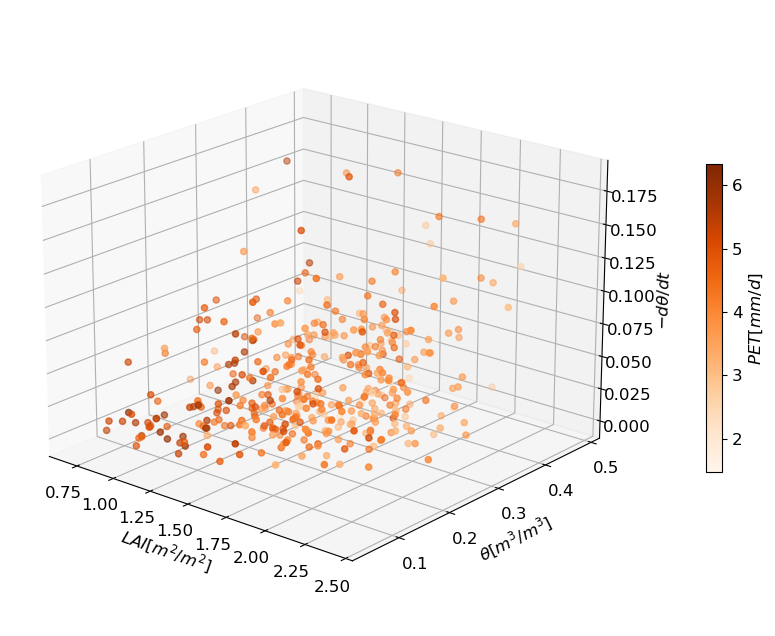

In [119]:
fig = plt.figure(figsize=(8, 8))
fig.tight_layout(pad=5)
ax4 = fig.add_subplot(1,1,1,projection='3d')
# Data for a three-dimensional line
p = ax4.scatter3D(lai, sm, neg_dSdt, c=pet, cmap='Oranges');
ax4.set_xlabel(label_lai)
ax4.set_ylabel(label_SM)
ax4.set_zlabel(label_dSdt)
# fig.colorbar(p, ax=ax4)
ax4.view_init(20, 310)
cax = fig.add_axes([ax4.get_position().x1+0.1, ax4.get_position().y0 + ax4.get_position().height*0.25, 0.02, ax4.get_position().height*0.5])
cbar = fig.colorbar(p, cax=cax)
cbar.set_label(label_PET, rotation=90)
fig.savefig(os.path.join(output_path, f'{save_title}_Ltheta_3d.png'))

